LDA 개념 알아야 할 것
1. 사전확률 
2. 평균
3. 분산

In [1]:
# 분류(classification)

# 필요한 라이브러리 불러오기

# 데이터, 시각화 관련 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 분류 관련 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# train test data 분리하기 위한 라이브러리
from sklearn.model_selection import train_test_split

In [4]:
# classification 평가를 위한 라이브러리
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score # 정밀도, 재현율, 정확도

In [5]:
# 붓꽃(iris) 데이터 로딩

from sklearn.datasets import load_iris

In [7]:
# 로지스틱 회귀

# 맛보기 예제

# train data 정의

X = np.array([[-1,-1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0,0,0,1,1,1])

In [8]:
# test data 정의

test_X = [[2,2]] # 모두 양수일 경우
test_X_ = [[-2,-2]] # 모두 음수일 경우

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_8056\1958762030.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


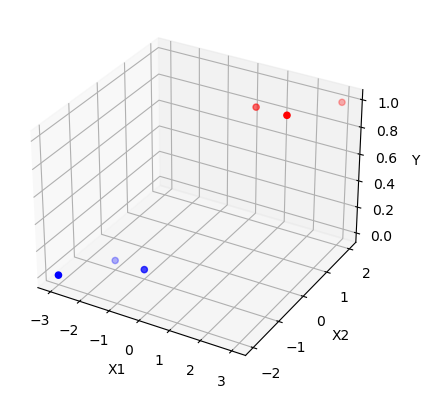

In [9]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter([-1, -2, -3], [-1, -1, -2], [0,0,0], color = 'blue')
ax.scatter([1,2,3], [1,1,2], [1,1,1], color = 'red')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

In [11]:
# 훈련

clf_lr = LogisticRegression()
clf_lr.fit(X, y)

LogisticRegression()

In [15]:
clf_lr.predict_proba(test_X)
# 클래스 1로 나올 확률 : 95.1%

array([[0.04891763, 0.95108237]])

In [16]:
# 클래스 확률 예측

clf_lr.predict(test_X)

array([1])

In [17]:
clf_lr.predict_proba(test_X_)
# 클래스 0으로 나올 확률 : 95.1%

array([[0.95108237, 0.04891763]])

In [18]:
clf_lr.predict(test_X_)

array([0])

In [19]:
# 간단한 예제(LDA)

# 훈련

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

LinearDiscriminantAnalysis()

In [20]:
# 클래스 확률 예측
clf_lda.predict_proba(test_X)

array([[1.12535162e-07, 9.99999887e-01]])

In [21]:
clf_lda.predict(test_X)

array([1])

In [22]:
clf_lda.predict_proba(test_X_)

array([[9.99999887e-01, 1.12535162e-07]])

In [23]:
clf_lda.predict(test_X_)

array([0])

In [25]:
# heart 예제

heart = pd.read_csv('./Heart.csv', index_col = 0)
heart[:10]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [26]:
heart.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [27]:
# predictor(예측변수) 와 response(반응변수) 정의

X = heart[['Age', 'Sex', 'Chol']]
y = heart['AHD']

In [28]:
# train data, test data 구분

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=32, stratify = y)


In [29]:
# 훈련

clf_heart = LinearDiscriminantAnalysis()
clf_heart.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
clf_heart.predict(X_test)

array(['No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes'], dtype='<U3')

In [31]:
y_pred = clf_heart.predict(X_test)

In [32]:
# 모델 평가(잘 분류되었나?)
# >> 혼동행렬(confusion matrix)

confusion_matrix(y_test, y_pred)

array([[14,  3],
       [ 7,  7]], dtype=int64)

In [37]:
# classification 결과 평가

# Accuracy(정확도) 
# (TP + TN) / (TP + FP + FN + TN)
print('Accuarcy :', accuracy_score(y_test, y_pred))
print()

# Precision(정밀도) : 예측한 결과가 실제로 맞은 것
# TP / (TP + FP)
print('Precision :', precision_score(y_test, y_pred, average = 'macro'))
print()

# recall(재현율) : 실제를 잘 예측하는 정도 
# TP / (TP + FN)
print('Recall :', recall_score(y_test, y_pred, average='macro'))
print()


Accuarcy : 0.6774193548387096

Precision : 0.6833333333333333

Recall : 0.6617647058823529



In [38]:
# 붓꽃(iris) 데이터 활용 예제

X, y = load_iris(return_X_y = True)

In [41]:
# 훈련

clf = LogisticRegression(random_state=32).fit(X,y)

c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# 클래스 예측

clf.predict_proba(X)

array([[9.81797141e-01, 1.82028445e-02, 1.44269293e-08],
       [9.71725476e-01, 2.82744937e-02, 3.01659208e-08],
       [9.85444223e-01, 1.45557643e-02, 1.23263078e-08],
       [9.76282998e-01, 2.37169623e-02, 3.97229604e-08],
       [9.85381263e-01, 1.46187255e-02, 1.19450737e-08],
       [9.70457205e-01, 2.95427213e-02, 7.35307149e-08],
       [9.86879212e-01, 1.31207678e-02, 1.99800358e-08],
       [9.76395201e-01, 2.36047710e-02, 2.76315897e-08],
       [9.79831319e-01, 2.01686506e-02, 3.06875994e-08],
       [9.69130364e-01, 3.08696046e-02, 3.16498069e-08],
       [9.76506883e-01, 2.34930977e-02, 1.92207309e-08],
       [9.75396301e-01, 2.46036553e-02, 4.38552739e-08],
       [9.74557148e-01, 2.54428301e-02, 2.14857551e-08],
       [9.91967765e-01, 8.03223109e-03, 3.89483945e-09],
       [9.88209458e-01, 1.17905393e-02, 2.80767915e-09],
       [9.86771830e-01, 1.32281572e-02, 1.27909501e-08],
       [9.88115327e-01, 1.18846639e-02, 9.19925673e-09],
       [9.81552606e-01, 1.84473

In [43]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
clf.score(X,y)

0.9733333333333334